In [38]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import tensorflow as tf
import pandas as pd

In [3]:
from tensorflow import keras

In [4]:
import numpy as np

In [5]:
print(tf.__version__)

1.13.0-rc2


In [6]:
imdb = keras.datasets.imdb

In [7]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 7s 0us/step


In [9]:
print('training {}'.format(len(train_data)))

training 25000


In [10]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [11]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 2s 1us/step


In [12]:
type(word_index)

dict

In [15]:
word_index = {k:(v+3) for k,v in word_index.items()}

In [19]:
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3

In [21]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [24]:
reverse_word_index[111]

'many'

In [25]:
type(train_data)

numpy.ndarray

In [29]:
type(train_data[0])

list

In [30]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [31]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [34]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 1s 74us/sample - loss: 0.6923 - acc: 0.5079 - val_loss: 0.6907 - val_acc: 0.5480
Epoch 2/40
15000/15000 [==============================] - 1s 48us/sample - loss: 0.6878 - acc: 0.5781 - val_loss: 0.6840 - val_acc: 0.6292
Epoch 3/40
15000/15000 [==============================] - 1s 53us/sample - loss: 0.6764 - acc: 0.6373 - val_loss: 0.6683 - val_acc: 0.6713
Epoch 4/40
15000/15000 [==============================] - 1s 48us/sample - loss: 0.6547 - acc: 0.7094 - val_loss: 0.6435 - val_acc: 0.7018
Epoch 5/40
15000/15000 [==============================] - 1s 44us/sample - loss: 0.6236 - acc: 0.7445 - val_loss: 0.6113 - val_acc: 0.7579
Epoch 6/40
15000/15000 [==============================] - 1s 44us/sample - loss: 0.5855 - acc: 0.7887 - val_loss: 0.5743 - val_acc: 0.7917
Epoch 7/40
15000/15000 [==============================] - 1s 43us/sa

In [35]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 36us/sample - loss: 0.3313 - acc: 0.8719
[0.3312730825376511, 0.87192]


In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

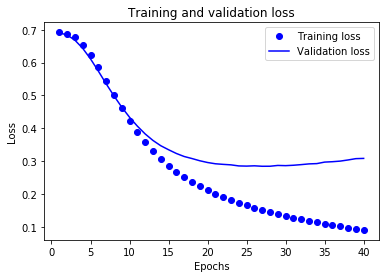

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
df_train = 